In [1]:
from datascience import *
import math
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
#reading the original data in
Video_Data = Table.read_table('Business_Dataset.csv')
Video_Data.show(5)

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update
Tetris,Series_b,The Tetris Company,Alexey Pajitnov,nan,nan,nan,496.40m,nan,nan,nan,nan,nan,01st Jan 88,27th Feb 20
Pokemon,Series_b,Nintendo,Game Freak,nan,nan,nan,480.66m,nan,nan,nan,nan,nan,28th Sep 98,03rd Feb 20
Call of Duty,Series_b,Activision,Infinity Ward,nan,nan,nan,425.00m,nan,nan,nan,nan,nan,29th Oct 03,03rd Feb 20
Grand Theft Auto,Series_b,Rockstar Games,Rockstar North,nan,nan,nan,405.00m,nan,nan,nan,nan,nan,27th Mar 98,03rd Feb 20
Super Mario,Series_b,Nintendo,Nintendo,nan,nan,nan,402.36m,nan,nan,nan,nan,nan,20th Jul 83,20th Feb 20


In [3]:
#obtaining just the year for the release date in every row
release_date = Video_Data.column("Release Date")
year = []
for i in range(0, len(release_date)):
    date = release_date[i].split()[-1]
    year.append(date)

In [4]:
#removing the release date column from dataset and corresponding data
Video_Data_drop = Video_Data.drop("Release Date")
#adding a new "release data" column that contains just the released year for corresponding game
Video_Data_Release = Video_Data_drop.with_column("Release_Date", year)
#replacing "nan" string with "0" string in Total Sales column
Total_Sales = Video_Data_Release.column("Total Sales")
remove_nan_TotalSales = []
for i in range(0, len(Total_Sales)):
    if Total_Sales[i] == "nan":
        remove_nan_TotalSales.append('0')
    else:
        remove_nan_TotalSales.append(Total_Sales[i])
Video_Data_Release_drop_TotalSales = Video_Data_Release.drop("Total Sales")
Video_Data_Release_TotalSales = Video_Data_Release_drop_TotalSales.with_column("Total_Sales", remove_nan_TotalSales)
Video_Data_Release_TotalSales.show(5)

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,NA Sales,PAL Sales,Japan Sales,Other Sales,Last Update,Release_Date,Total_Sales
Tetris,Series_b,The Tetris Company,Alexey Pajitnov,nan,nan,nan,496.40m,nan,nan,nan,nan,27th Feb 20,88,0
Pokemon,Series_b,Nintendo,Game Freak,nan,nan,nan,480.66m,nan,nan,nan,nan,03rd Feb 20,98,0
Call of Duty,Series_b,Activision,Infinity Ward,nan,nan,nan,425.00m,nan,nan,nan,nan,03rd Feb 20,03,0
Grand Theft Auto,Series_b,Rockstar Games,Rockstar North,nan,nan,nan,405.00m,nan,nan,nan,nan,03rd Feb 20,98,0
Super Mario,Series_b,Nintendo,Nintendo,nan,nan,nan,402.36m,nan,nan,nan,nan,20th Feb 20,83,0


In [5]:
#removing all rows that have "0" as Total Sales (bc they were not provided)
j = Video_Data_Release_TotalSales.column("Total_Sales")
index = []
for i in range(0, len(j)):
    if j[i] != "0":
        index.append(i)
Video_Data_Release_TotalSales_nan = Video_Data_Release_TotalSales.take(index)
#removing all rows that have "nan" variable under Release Date column
k = Video_Data_Release_TotalSales_nan.column("Release_Date")
index = []
for i in range(0, len(k)):
    if k[i] != "nan":
        index.append(i)
Video_Data_Release_TotalSales_NAN = Video_Data_Release_TotalSales_nan.take(index)
#always have to run 1st

In [6]:
#removing the m, that stands for million, from strings in Total Sales
t = Video_Data_Release_TotalSales_NAN.column("Total_Sales")
m = []
for i in t:
    num = ""
    for n in range(0, len(i)-1):
        num += i[n]
    m.append(num)
#replacing the Total Sales column with new Total Sales column that contains the numbers w/out the m
Video_Data_Release_TotalSales_NAN = Video_Data_Release_TotalSales_NAN.drop("Total_Sales").with_column("Total_Sales_M", m)


In [7]:
#changing the string type in total sales column into float types
not_num = Video_Data_Release_TotalSales_NAN.column("Total_Sales_M")
num = []

for i in not_num:
    num.append(float(i))
Video_Data_Release_TotalSales_NAN = Video_Data_Release_TotalSales_NAN.drop("Total_Sales_M").with_column("Num_Total_Sales_M", num)
#creating sepearte data sets that contain the rows w/only corresponding decade release date
tens = Video_Data_Release_TotalSales_NAN.where("Release_Date", are.between("00", "10"))
nine = Video_Data_Release_TotalSales_NAN.where("Release_Date", are.between_or_equal_to("90","99"))

In [8]:
#average total sales for the 90s based on publisher
nine.select('Publisher', 'Num_Total_Sales_M').group('Publisher', np.average)

Publisher,Num_Total_Sales_M average
3DO,0.532857
989 Sports,0.38
989 Studios,0.889375
A1 Games,0.02
ASC Games,0.393333
ASCII Entertainment,0.377273
ASK,0.03
Acclaim Entertainment,0.411282
Accolade,0.53
Activision,0.654


In [9]:
#average total sales for the 2000s based on publisher
tens.select('Publisher', 'Num_Total_Sales_M').group('Publisher', np.average)

Publisher,Num_Total_Sales_M average
10TACLE Studios,0.12
1C Company,0.00666667
2K Games,0.33566
2K Play,0.458696
2K Sports,0.279245
3 O'Clock,0.03
3DO,0.158158
49Games,0.03
505 Games,0.135682
5pb,0.0122581


In [10]:
# taking out rows that have "nan" under critic score column in the 90s dataset
c = nine.column("Critic Score")
index = []
for i in range(0, len(c)):
    if c[i] > 0.0:
        index.append(i)
nine_C = nine.take(index)
nine_C.show(5)

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,NA Sales,PAL Sales,Japan Sales,Other Sales,Last Update,Release_Date,Num_Total_Sales_M
Driver,PS_b,GT Interactive,Reflections Interactive,nan,8.5,nan,nan,3.11m,2.80m,0.02m,0.33m,nan,99,6.27
Tekken 2,PS_b,Namco,Namco,nan,9.1,nan,nan,2.26m,1.89m,1.36m,0.23m,nan,96,5.74
Tomb Raider II,PS_b,Eidos Interactive,Core Design Ltd.,nan,7.6,nan,nan,2.30m,2.46m,0.20m,0.28m,nan,97,5.24
Microsoft Flight Simulator,PC_b,Microsoft,Microsoft,nan,7,nan,nan,3.22m,1.69m,nan,0.20m,nan,96,5.12
Tony Hawk's Pro Skater,PS_b,Activision,Neversoft Entertainment,nan,9.6,nan,nan,3.42m,1.38m,0.02m,0.20m,nan,99,5.02


In [11]:
#average critic score based on publisher in the 90s
nine_C.select('Publisher', 'Critic Score').group('Publisher', np.average)

Publisher,Critic Score average
3DO,4.2
989 Studios,5.38
ASC Games,6.4
ASCII Entertainment,6.56667
Acclaim Entertainment,5.73846
Accolade,5.8
Activision,6.5
Agetec,5.46667
Atari,7.9
Atlus,7.45


In [12]:
# taking out rows that have "nan" under critic score column in 2000s dataset
c = tens.column("Critic Score")
index = []
for i in range(0, len(c)):
    if c[i] > 0.0:
        index.append(i)
ten_C = tens.take(index)
ten_C.show(5)

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,NA Sales,PAL Sales,Japan Sales,Other Sales,Last Update,Release_Date,Num_Total_Sales_M
Grand Theft Auto: Vice City,PS2_b,Rockstar Games,Rockstar North,nan,9.6,nan,nan,8.41m,5.49m,0.47m,1.78m,nan,02,16.15
Call of Duty: Modern Warfare 2,X360_b,Activision,Infinity Ward,9,9.5,9,nan,8.54m,3.63m,0.08m,1.28m,nan,09,13.53
Grand Theft Auto III,PS2_b,Rockstar Games,DMA Design,nan,9.5,nan,nan,6.99m,4.51m,0.30m,1.30m,nan,01,13.1
Grand Theft Auto IV,X360_b,Rockstar Games,Rockstar North,9,10,nan,nan,6.80m,3.11m,0.14m,1.04m,nan,08,11.09
Call of Duty: Modern Warfare 2,PS3_b,Activision,Infinity Ward,9,9.5,nan,nan,4.99m,3.66m,0.38m,1.59m,nan,09,10.61


In [13]:
#getting an array of the top ten names of publishers w. highest average critic score in
#2000s dataset
Av_Score_ten = ten_C.select('Publisher', 'Critic Score').group('Publisher', np.average)
Av_Score_ten.sort(1, descending = True)
topten_ten_Score = Av_Score_ten.sort(1, descending = True).take(range(10)).column(0)
topten_ten_Score

array(['Rare', 'Square', 'Valve', 'Fox Interactive', 'Maxis', 'RedOctane',
       'Kalypso', 'MTV Games', 'GT Interactive', 'Gathering of Developers'],
      dtype='<U28')

In [14]:
#obtaining only the rows of the top ten publishers w/ highest average critic score in 2000s data set
pub = ten_C.column("Publisher")
index = []
for i in range(0, len(pub)):
    for k in topten_ten_Score:
        if k == pub[i]:
            index.append(i)
top_ten = ten_C.take(index)

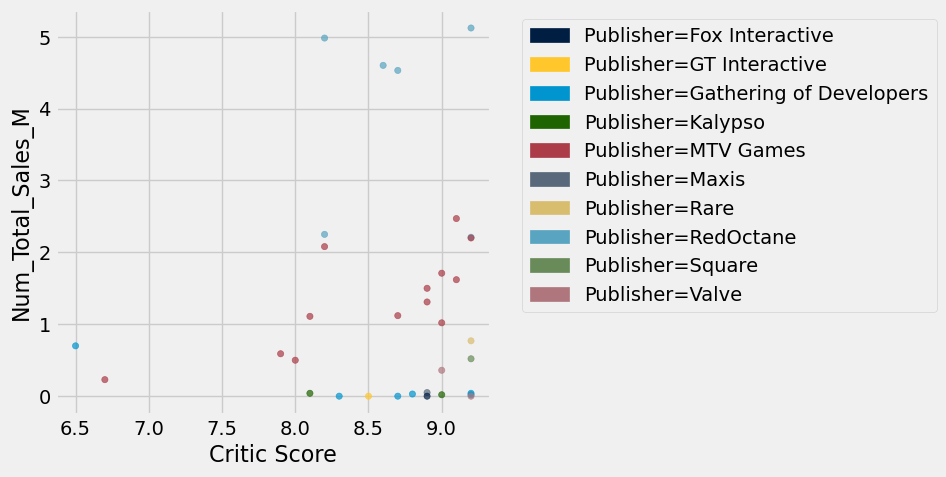

In [15]:
#plotting the top ten based on average critic score (top ten)
top_ten.scatter('Critic Score', 'Num_Total_Sales_M', group = 'Publisher')

In [16]:
#getting an array of the top ten names of publishers w. highest average total sales in
#2000s dataset
Av_Sales_ten = ten_C.select('Publisher', 'Num_Total_Sales_M').group('Publisher', np.average)
topten_ten_Sales = Av_Sales_ten.sort(1, descending = True).take(range(10)).column(0)
topten_ten_Sales

array(['RedOctane', 'Rockstar Games', 'MTV Games', 'LucasArts',
       'Universal Interactive', 'Bethesda Softworks', 'Electronic Arts',
       'Activision', 'Sony Computer Entertainment', 'EA Sports'],
      dtype='<U28')

In [17]:
#obtaining only the rows of the top ten publishers w/ highest average total sales in 2000s data set
pub = ten_C.column("Publisher")
index = []
for i in range(0, len(pub)):
    for k in topten_ten_Sales:
        if k == pub[i]:
            index.append(i)
top_ten_s = ten_C.take(index)

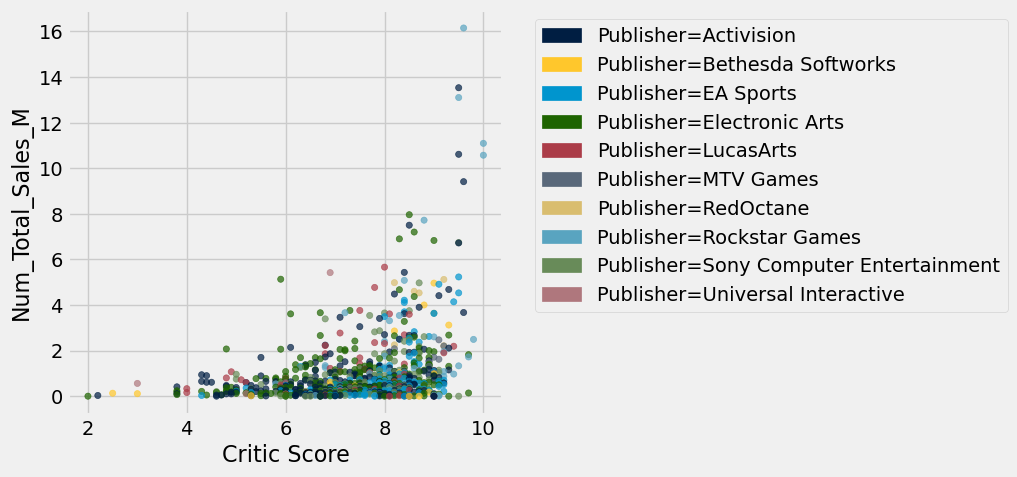

In [18]:
#plotting the top ten based on average total sales (top ten)
top_ten_s.scatter("Critic Score", 'Num_Total_Sales_M', group = 'Publisher')

In [19]:
#getting an array of the top ten names of publishers w. highest average total sales in
#90s dataset
Av_Sales_nine = nine_C.select('Publisher', 'Num_Total_Sales_M').group('Publisher', np.average)
topten_nine_Sales = Av_Sales_nine.sort(1, descending = True).take(range(10)).column(0)
topten_nine_Sales

array(['Microsoft', 'Namco', 'Eidos Interactive', 'GT Interactive',
       'EA Sports', 'Rockstar Games', 'Electronic Arts', 'Maxis',
       'Activision', 'Hudson Soft'],
      dtype='<U27')

In [20]:
#obtaining only the rows of the top ten publishers w/ highest average total sales in 90s data set
pub = nine_C.column("Publisher")
index = []
for i in range(0, len(pub)):
    for k in topten_nine_Sales:
        if k == pub[i]:
            index.append(i)
top10_nine_Sales = nine_C.take(index)

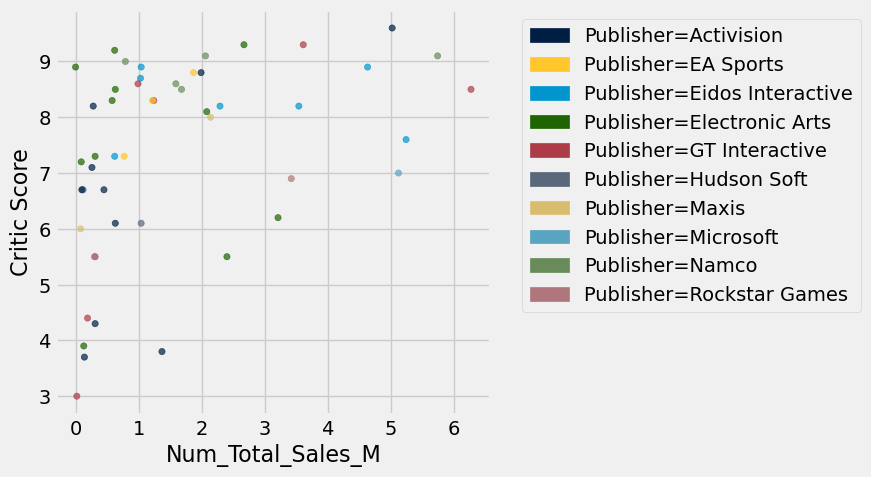

In [21]:
#plotting the top ten publishers w. highest average total sales in 90s data set
top10_nine_Sales.scatter('Num_Total_Sales_M', "Critic Score", group = 'Publisher')

In [22]:
#getting an array of the top ten names of publishers w. highest average critic score in
#90s dataset
Av_Score_nine = nine_C.select('Publisher', 'Critic Score').group('Publisher', np.average)
topten_nine_Score = Av_Score_nine.sort(1, descending = True).take(range(10)).column(0)
topten_nine_Score

array(['LucasArts', 'Microprose', 'Namco', 'ESP', 'Sierra Entertainment',
       'Fox Interactive', 'Working Designs', 'EA Sports', 'Tecmo',
       'Westwood Studios'],
      dtype='<U27')

In [23]:
#obtaining only the rows of the top ten publishers w/ highest average total critic score in 90s data set
pub = nine_C.column("Publisher")
index = []
for i in range(0, len(pub)):
    for k in topten_nine_Score:
        if k == pub[i]:
            index.append(i)
top10_nine_Score = nine_C.take(index)

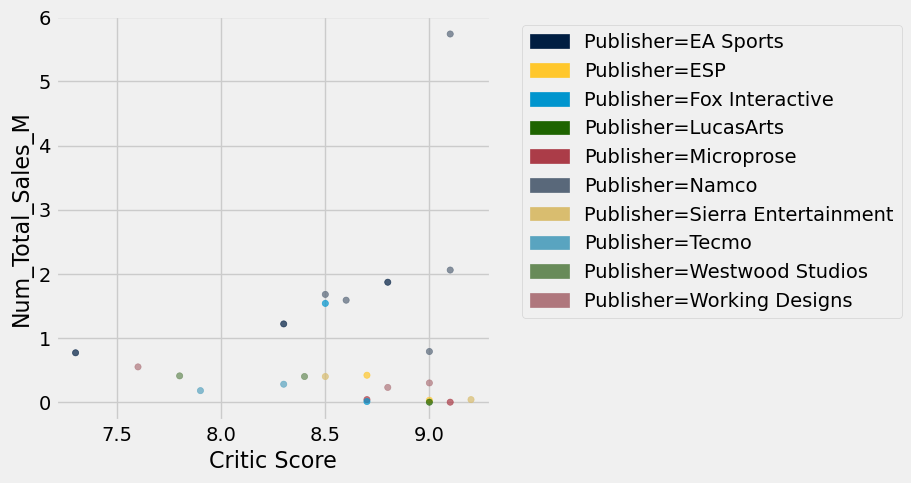

In [24]:
#plotting the top ten publishers w. highest average total sales in 90s data set
top10_nine_Score.scatter("Critic Score", 'Num_Total_Sales_M',  group = 'Publisher')